# Orbit: high-level class to evaluate Keplerian orbits

**Author:** Hannu Parviainen </br>
**Last edited:** 24.8.2022

`snappyko.Orbit` is a high-level class for extremely fast evaluation of Keplerian orbits mainly intented for the modelling of exoplanet orbits. The class offers the tools to evaluate the `xyz` position of the planet, the orbital phase angle, and the light travel time. The `snappyko` package includes also much lower-level functionality but these will be made available as accessible higher-level classes and functions later.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append('..')

In [3]:
from matplotlib.pyplot import rc, subplots, setp
rc('figure', figsize=(13,4))

from snappyko import Orbit

## Usage

The `snappyko.Orbit` class is designed to be as easy to use as possible. All you need is to initialise an `Orbit` object and set the time stamps using `Orbit.set_data`. After this, you can compute the quantities you want by first setting the orbital parameters using `Orbit.set_pars` and calling the methods:

- `Orbit.xyz()`: the x, y, and z positions of the planet for each time stamp
- `Orbit.phase()`: the phase angle of the planet for each time stamp
- `Orbit.light_travel_time(rstar)`: the light travel time for each time stamp in days.

*Note*: The `Orbit` class supports evaluating the orbit only for a single set of orbital parameters at a time, support for orbital parameter arrays will be added later.

(14.0, -14.0)

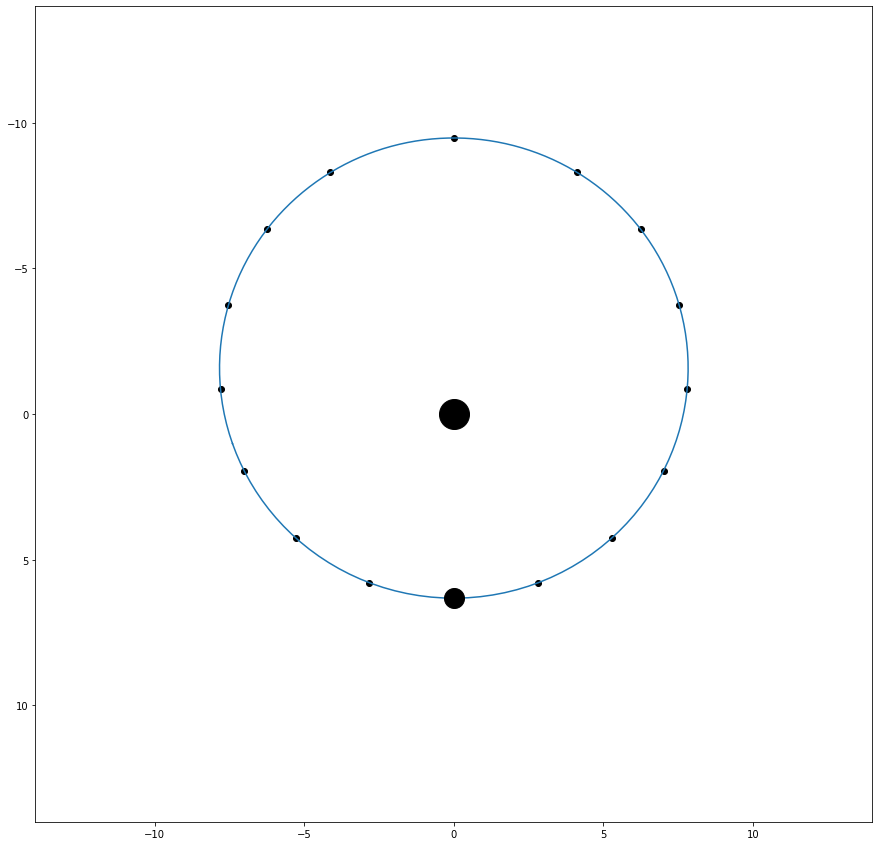

In [54]:
o = Orbit(17, 'ea')

t0, p, a, i, e, w = 0.20, 1.2, 8.0, 0.45*pi, 0.2, 0.5*pi
times = linspace(0.0, p, 150)

o.set_data(times)
o.set_pars(t0, p, a, i, e, w)

x, y, z = o.xyz()

xp, _, zp = o.xyz(array([t0]))


fig, ax = subplots(figsize=(15,15))
ax.plot(0, 0, 'ok', ms=30)
ax.plot(o._coeffs[:,0], o._coeffs[:,2], 'ok')
ax.plot(x, z)
ax.plot(xp, zp, 'ok', ms=20)


xlim(-14,14)
ylim(14,-14)

In [55]:
xe, ye, ze = o._xyz_error()

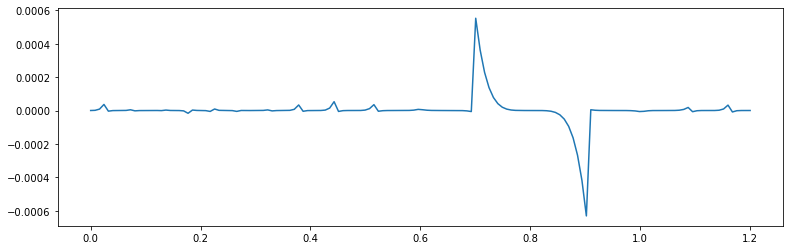

In [53]:
plot(o.times, xe)

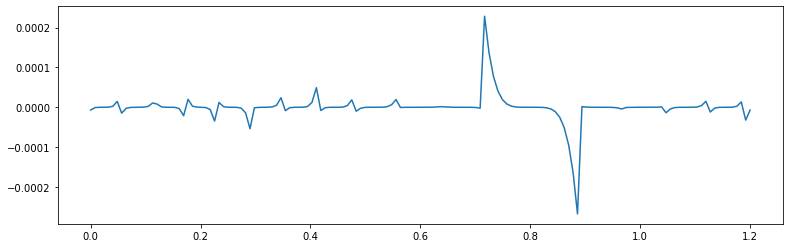

In [56]:
plot(o.times, xe)

## Orbit visualisation

The orbit can be plotted using the `Orbit.plot()` method.

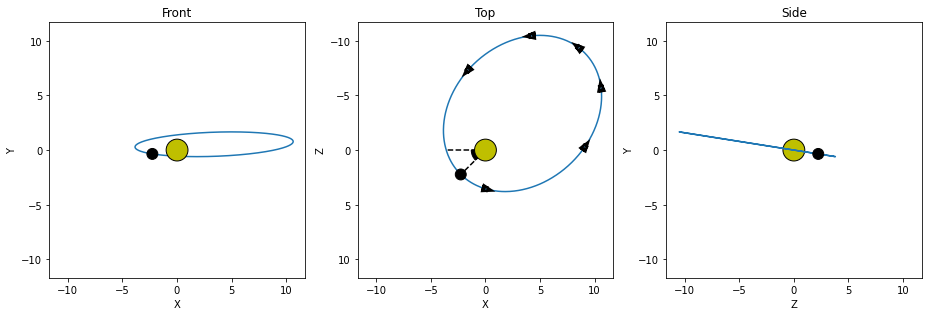

In [12]:
o.plot(figsize=(13,6))

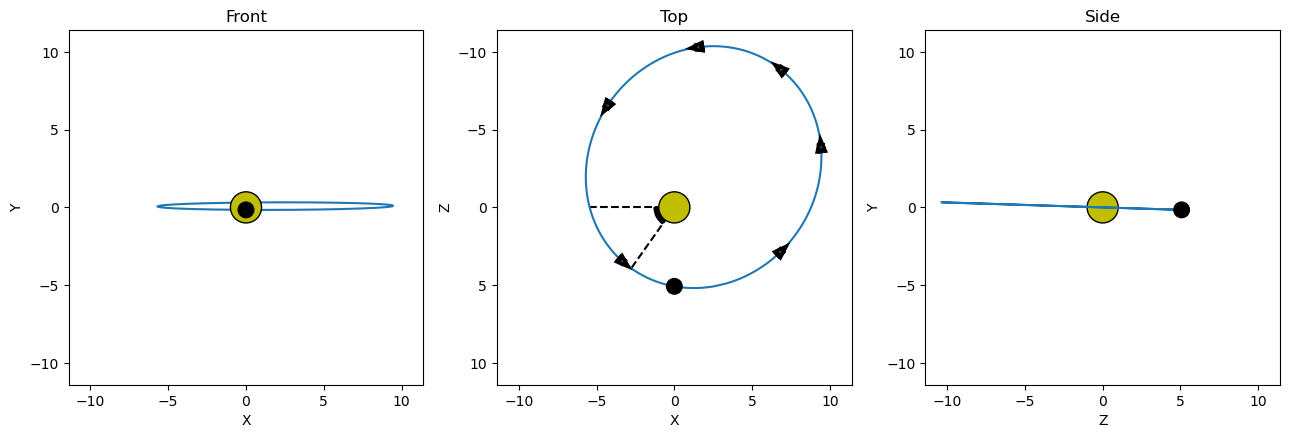

In [7]:
o.plot(figsize=(13,6))

## X, Y, and Z

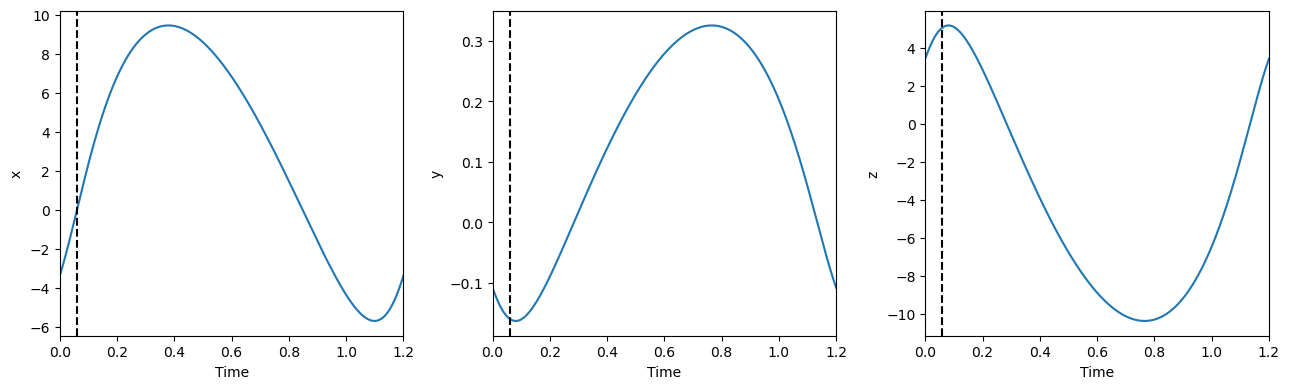

In [8]:
x, y, z = o.xyz()

fig, axs = subplots(1, 3)
axs[0].plot(o.times, x)
axs[1].plot(o.times, y)
axs[2].plot(o.times, z)
[ax.axvline(t0, c='k', ls='--') for ax in axs]
setp(axs, xlabel='Time', xlim=o.times[[0,-1]])
[setp(ax, ylabel=yl) for yl,ax in zip('xyz', axs)]
fig.tight_layout()

## True and mean anomaly 

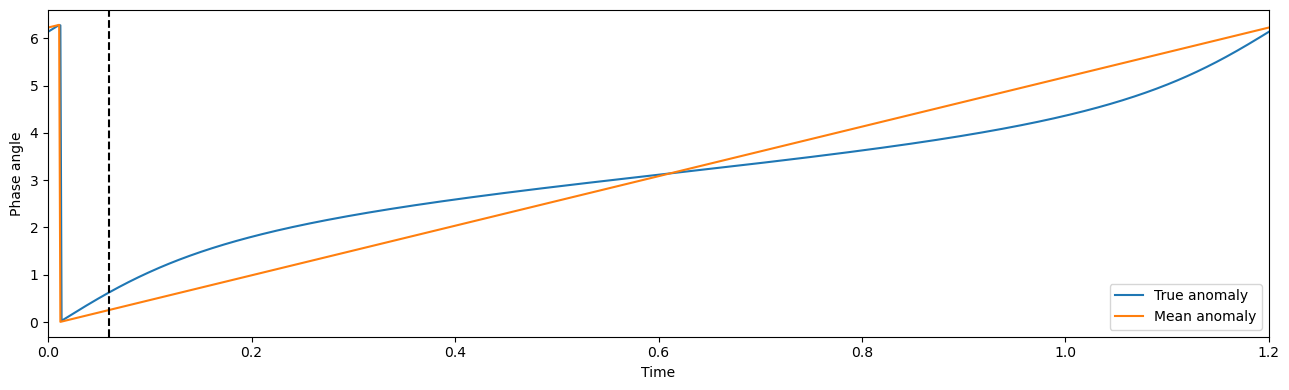

In [9]:
ta = o.true_anomaly()
ma = o.mean_anomaly()

fig, ax = subplots()
ax.plot(o.times, ta, label='True anomaly')
ax.plot(o.times, ma, label='Mean anomaly')
ax.legend()
setp(ax, xlabel='Time', ylabel='Phase angle', xlim=o.times[[0,-1]])
ax.axvline(t0, c='k', ls='--')
fig.tight_layout()

## Phase angle

The orbital phase angle can be calculated through the `Orbit.phase()` method.

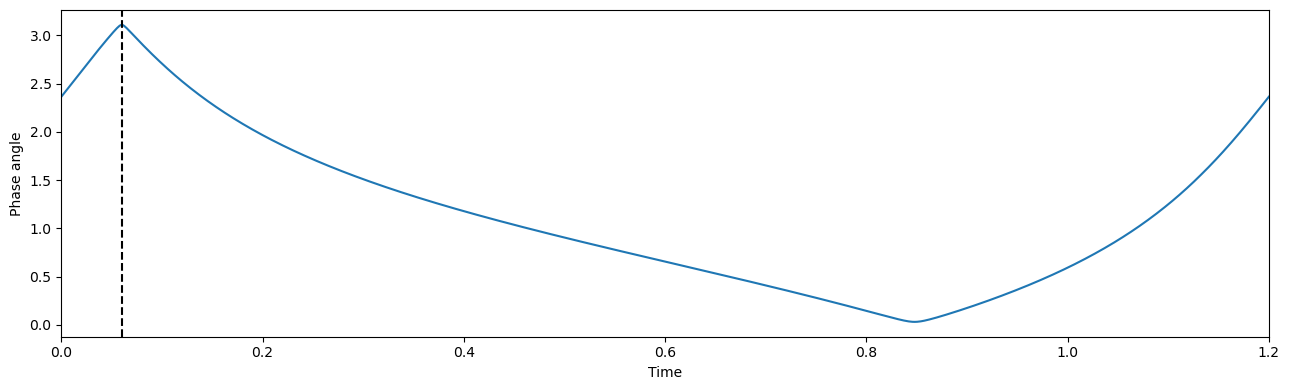

In [10]:
phase = o.phase()

fig, ax = subplots()
ax.plot(o.times, phase)
setp(ax, xlabel='Time', ylabel='Phase angle', xlim=o.times[[0,-1]])
ax.axvline(t0, c='k', ls='--')
fig.tight_layout()

##  Theta

The theta angle ($\pi$ - phase) can be calculated using the `Orbit.theta()` method.

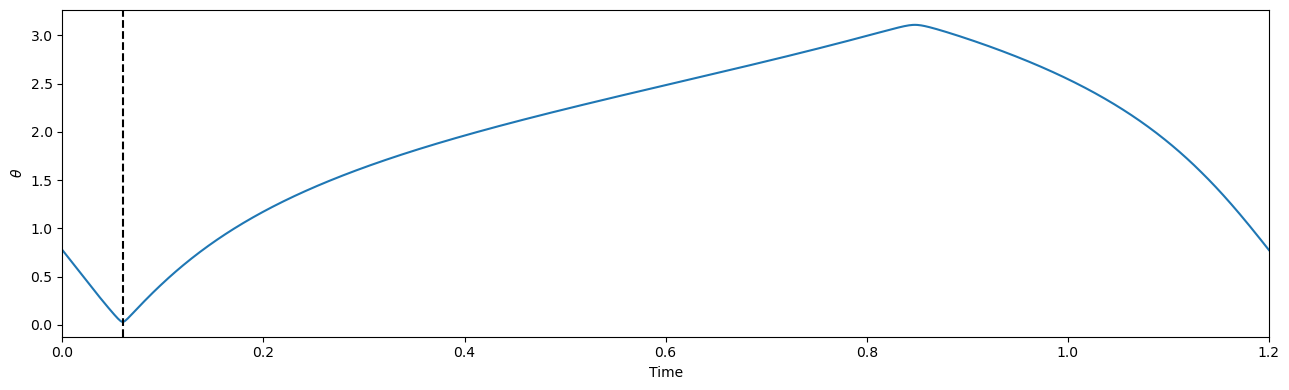

In [11]:
theta = o.theta()

fig, ax = subplots()
ax.plot(o.times, theta)
setp(ax, xlabel='Time', ylabel=r'$\theta$', xlim=o.times[[0,-1]])
ax.axvline(t0, c='k', ls='--')
fig.tight_layout()

##  Star-planet distance

Star-planet distance in stellar radii can be calculated using the `Orbit.star_planet_distance()` method.

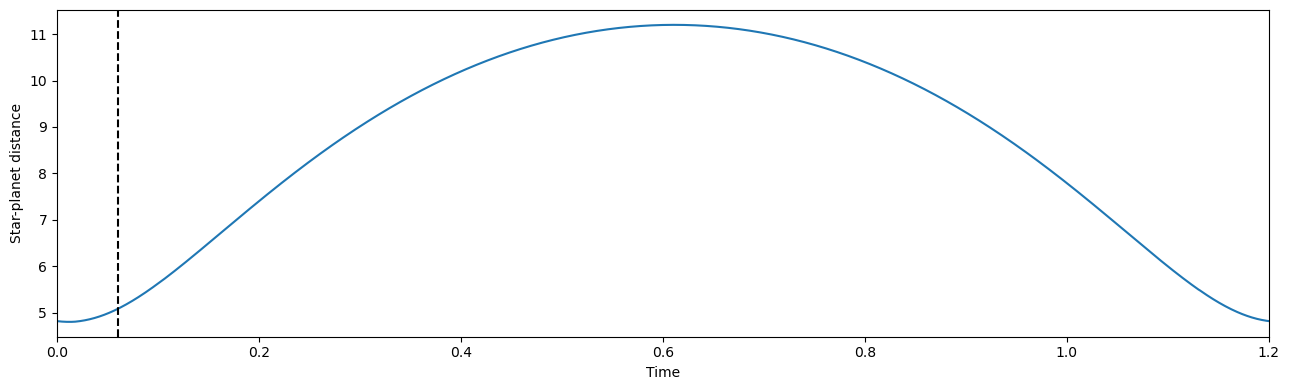

In [12]:
spd = o.star_planet_distance()

fig, ax = subplots()
ax.plot(o.times, spd)
setp(ax, xlabel='Time', ylabel='Star-planet distance', xlim=o.times[[0,-1]])
ax.axvline(t0, c='k', ls='--')
fig.tight_layout()

## Light travel time

Light travel time can be calculated using the `Orbit.light_travel_time()` method that takes the stellar radius (in Solar radii) as its sole argument.

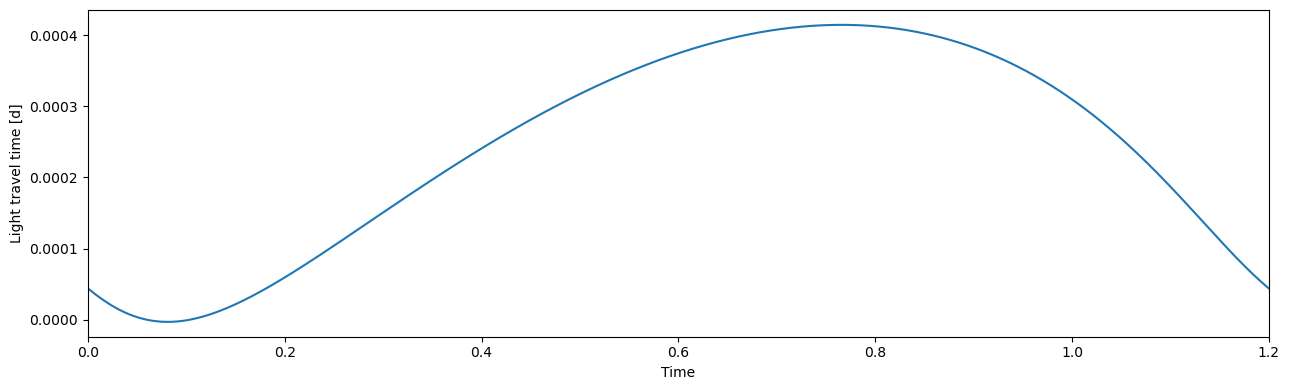

In [13]:
ltt = o.light_travel_time(rstar=1)

fig, ax = subplots()
plot(o.times, ltt)
setp(ax, xlabel='Time', ylabel='Light travel time [d]', xlim=o.times[[0,-1]])
fig.tight_layout()

---

<center> &copy;2022 Hannu Parviainen </center>